# Supervised Learning - Building a Student Performace Prediction System


In [6]:
from platform import python_version
print(python_version())

3.5.2


# Classification vs. Regression
The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?
Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

# Logistic Regression

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance

# Question 1 - Exploring the Data (0.5 points)
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing


students_data = pd.read_csv("students-data.csv", delimiter  = ';')
students_data.head()
# students_data.shape

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Question 2 - drop missing values (0.5 points)
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*
*Use .dropna() function to drop the NAs*

#### Answer:

In [2]:
students_data.index.name = 'number'
students_data.head()

print(students_data.isnull().sum(axis = 0))

# There are no missing values in the data

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


# Transform Data

## Question 3 (0.5 points)

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [3]:
students_data.select_dtypes( include = ['object']).shape
# students_data.dtypes

(395, 17)

# Question 4 - Drop variables with less variance (0.5 points)

*Find the variance of each numerical independent variable and drop whose variance is less than 1. Use .var function to check the variance*

In [4]:
# print(students_data)
students_data_numerical = students_data.select_dtypes( exclude = ['object'])

for column in students_data_numerical.columns:
    if(students_data_numerical[column].var() < 1):
        print(column)
        students_data.drop(column,1,inplace = True)
        
students_data.head()
print(students_data.var())
print(students_data.shape)


traveltime
studytime
failures
famrel
freetime
Dalc
age          1.628285
Medu         1.198445
Fedu         1.184180
goout        1.239388
Walc         1.658678
health       1.932944
absences    64.049541
G1          11.017053
G2          14.148917
G3          20.989616
dtype: float64
(395, 27)


#### Variables with less variance are almost same for all the records. Hence, they do not contribute much for classification.

# Question 6 - Encode all categorical variables to numerical (0.5 points)

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [5]:
students_data_categorical = students_data.select_dtypes( include = ['object'])

le = preprocessing.LabelEncoder()
for column in students_data_categorical:
#     print(column)
    le.fit(students_data[column])
    print(list(le.classes_))
    students_data[column] = le.transform(students_data[column])
students_data.head(20)

['GP', 'MS']
['F', 'M']
['R', 'U']
['GT3', 'LE3']
['A', 'T']
['at_home', 'health', 'other', 'services', 'teacher']
['at_home', 'health', 'other', 'services', 'teacher']
['course', 'home', 'other', 'reputation']
['father', 'mother', 'other']
['no', 'yes']
['no', 'yes']
['no', 'yes']
['no', 'yes']
['no', 'yes']
['no', 'yes']
['no', 'yes']
['no', 'yes']


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10
5,0,1,16,1,1,1,4,3,3,2,...,1,1,0,2,2,5,10,15,15,15
6,0,1,16,1,1,1,2,2,2,2,...,1,1,0,4,1,3,0,12,12,11
7,0,0,17,1,0,0,4,4,2,4,...,1,0,0,4,1,1,6,6,5,6
8,0,1,15,1,1,0,3,2,3,2,...,1,1,0,2,1,1,0,16,18,19


# Question 7 - Convert the continuous values of grades into classes (1 point)

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [6]:
# students_data['G1'] = np.where(students_data['G1'])
for columns in students_data:
    if(columns == 'G1' or columns == 'G2' or columns == 'G3' ):
        students_data[columns] = np.where(students_data[columns] >=10, 1, 0)
students_data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,0,1,1
5,0,1,16,1,1,1,4,3,3,2,...,1,1,0,2,2,5,10,1,1,1
6,0,1,16,1,1,1,2,2,2,2,...,1,1,0,4,1,3,0,1,1,1
7,0,0,17,1,0,0,4,4,2,4,...,1,0,0,4,1,1,6,0,0,0
8,0,1,15,1,1,0,3,2,3,2,...,1,1,0,2,1,1,0,1,1,1


# Question 8 (0.5 points)

*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate feature and target attributes into separate dataframes with X and y variable names.*

In [7]:
test_df = students_data
X = pd.DataFrame()
Y = pd.DataFrame()
for column in test_df.columns:
    if(column != 'G3'):
        X[column] = test_df[column]
    else:
        Y[column] = test_df[column]
print(X)
print("!!!!")
print(Y)

        school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
number                                                                        
0            0    0   18        1        0        0     4     4     0     4   
1            0    0   17        1        0        1     1     1     0     2   
2            0    0   15        1        1        1     1     1     0     2   
3            0    0   15        1        0        1     4     2     1     3   
4            0    0   16        1        0        1     3     3     2     2   
5            0    1   16        1        1        1     4     3     3     2   
6            0    1   16        1        1        1     2     2     2     2   
7            0    0   17        1        0        0     4     4     2     4   
8            0    1   15        1        1        0     3     2     3     2   
9            0    1   15        1        0        1     3     4     2     2   
10           0    0   15        1        0        1 

# Question 9 - Training and testing data split (0.5 points)

# *So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [21]:
from sklearn.model_selection  import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=300, random_state=10)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

        school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
number                                                                        
57           0    1   15        1        0        1     4     4     4     1   
87           0    0   15        1        0        1     4     2     2     2   
175          0    1   17        1        1        1     4     3     4     2   
350          1    1   19        0        0        1     1     1     2     3   
260          0    0   18        1        0        1     4     3     3     2   
264          0    0   18        1        0        1     2     2     0     3   
170          0    1   16        1        0        1     3     4     2     2   
92           0    0   16        1        1        1     3     1     2     2   
259          0    0   17        1        1        1     2     2     3     3   
29           0    1   16        1        0        1     4     4     4     4   
263          0    0   17        1        0        1 

C:\Users\santosh\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Question 10 - Model Implementation and Testing the Accuracy (0.5 points)

*Build a **LogisticRegression** classifier using **fit()** functions in sklearn. 
* You need to import both Logistic regression and accuracy score from sklearn*
#### Answer:

In [22]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train,y_train)

logistic_reg.score(X_train,y_train)

C:\Users\santosh\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\santosh\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9266666666666666

# Question 11 - Print the intercept of the Logistic regression model (0.5 points)

The value of the intercepts are stored in the model itself. You can use .intercept_ function to do the same

In [23]:
logistic_reg.intercept_

array([0.31577351])

# Question 12 - Print the coefficients of the model (0.5 points) and name the coefficient which has the highest impact on the dependent variable (0.5 points)

Hint: Use .coef_ to get the coefficients and use pd.Dataframe to store the coefficients in a dataframe with column names same as the independent variable dataframe

In [24]:
logistic_reg.coef_
pd.DataFrame(logistic_reg.coef_,columns = X_train.columns).T

,0
school,0.096396
sex,-0.008057
age,-0.163503
address,-0.135106
famsize,-0.120207
Pstatus,-0.458031
Medu,0.055849
Fedu,-0.132125
Mjob,-0.082376
Fjob,0.247653


In [ ]:
# G2 has the highest impact on the dependent variable

# Question 13 - Predict the dependent variable for both training and test dataset (0.5 points)

Accuracy score() should help you to print the accuracies

In [25]:
logistic_reg.predict(X_train)

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [26]:
logistic_reg.predict(X_test)

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1])

In [27]:
logistic_reg.score(X_test,y_test)

0.8736842105263158

In [28]:
logistic_reg.score(X_train,y_train)

0.9266666666666666

# Information about the dataset

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

Attribute Information
1. ID - ID number of the image
2. Clump Thickness - 1 to 10
3. Cell Size - 1 to 10
4. Cell Shape - 1 to 10
5. Marginal Adhesion - 1 to 10
6. Single Epethelial cell size - 1 to 10
7. Bare nuclei - 1 to 10 
8. Normal Nucleoli - 1 to 10
9. Bland Chromatin - 1 to 10
10. Mitosis - 1 to 10
 
Class - Dependent Variable - 2 for benign 4 for malignant

### Read the data given in bc2.csv file

In [64]:
cell_info = pd.read_csv('bc2.csv')
cell_info.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### Observe the no.of records in dataset and type of each feature 

In [65]:
print(cell_info.describe(include='all'))
print(cell_info.dtypes)

                  ID  ClumpThickness   Cell Size  Cell Shape  \
count   6.990000e+02      699.000000  699.000000  699.000000   
unique           NaN             NaN         NaN         NaN   
top              NaN             NaN         NaN         NaN   
freq             NaN             NaN         NaN         NaN   
mean    1.071704e+06        4.417740    3.134478    3.207439   
std     6.170957e+05        2.815741    3.051459    2.971913   
min     6.163400e+04        1.000000    1.000000    1.000000   
25%     8.706885e+05        2.000000    1.000000    1.000000   
50%     1.171710e+06        4.000000    1.000000    1.000000   
75%     1.238298e+06        6.000000    5.000000    5.000000   
max     1.345435e+07       10.000000   10.000000   10.000000   

        Marginal Adhesion  Single Epithelial Cell Size Bare Nuclei  \
count          699.000000                   699.000000         699   
unique                NaN                          NaN          11   
top                  

### Use summary statistics to check if missing values, outlier and encoding treament is necessary


In [66]:
cell_info.describe(include='all').T
# No missing values


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,699,NaN,NaN,NaN,1.0717e+06,617096,61634,870688,1.17171e+06,1.2383e+06,1.34544e+07
ClumpThickness,699,NaN,NaN,NaN,4.41774,2.81574,1,2,4,6,10
Cell Size,699,NaN,NaN,NaN,3.13448,3.05146,1,1,1,5,10
Cell Shape,699,NaN,NaN,NaN,3.20744,2.97191,1,1,1,5,10
Marginal Adhesion,699,NaN,NaN,NaN,2.80687,2.85538,1,1,1,4,10
Single Epithelial Cell Size,699,NaN,NaN,NaN,3.21602,2.2143,1,2,2,4,10
Bare Nuclei,699,11,1,402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Normal Nucleoli,699,NaN,NaN,NaN,3.43777,2.43836,1,2,3,5,10
Bland Chromatin,699,NaN,NaN,NaN,2.86695,3.05363,1,1,1,4,10
Mitoses,699,NaN,NaN,NaN,1.58941,1.71508,1,1,1,1,10


### Check Missing Values

In [67]:

print(cell_info.isna().sum(axis = 0))
# No missing values


ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64


### Check how many `?` there in Bare Nuclei feature (they are also unknown or missing values). Replace them with the top value of the describe function of Bare Nuclei feature.

#### Check include='all' parameter in describe function

In [68]:
# cell_info['Bare Nuclei'].value_counts()
# test = cell_info
cell_info['Bare Nuclei'] = cell_info['Bare Nuclei'].map(lambda x: x if x != '?' else 1)
cell_info['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
1      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

### Print and plot the distribution of target variable (Class - using Histogram) 

In [70]:
import seaborn as sns



### convert the datatype of Bare Nuclei to `int`

In [71]:
cell_info['Bare Nuclei'] = pd.to_numeric(cell_info['Bare Nuclei'])
cell_info.dtypes

ID                             int64
ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

### Standardization of Data (Use Standard Scaler)

In [75]:

from sklearn.preprocessing import StandardScaler

# test = cell_info
scaler = StandardScaler() 
scaled_values = scaler.fit_transform(cell_info) 
cell_info.loc[:,:] = scaled_values
cell_info.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,-0.116239,0.206936,-0.699995,-0.743299,-0.633247,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912,-0.725397
1,-0.111504,0.206936,0.283845,0.266875,0.768621,1.710106,1.799664,-0.179662,-0.284112,-0.343912,-0.725397
2,-0.091265,-0.503866,-0.699995,-0.743299,-0.633247,-0.549561,-0.410685,-0.179662,-0.611825,-0.343912,-0.725397
3,-0.089884,0.562336,1.595632,1.613773,-0.633247,-0.097628,0.141902,-0.179662,1.354454,-0.343912,-0.725397
4,-0.088674,-0.148465,-0.699995,-0.743299,0.067687,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912,-0.725397


### Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them. (Use pd.scatter matrix())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027B6D0B9940>,
      dtype=object)

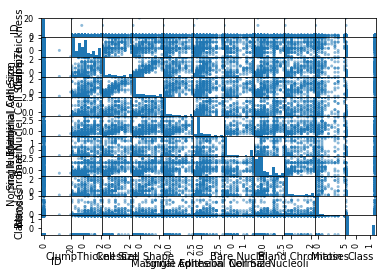

In [79]:
from pandas.plotting import scatter_matrix

scatter_matrix(cell_info)

<bound method DataFrame.corr of            ID  ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
0   -0.116239        0.206936  -0.699995   -0.743299          -0.633247   
1   -0.111504        0.206936   0.283845    0.266875           0.768621   
2   -0.091265       -0.503866  -0.699995   -0.743299          -0.633247   
3   -0.089884        0.562336   1.595632    1.613773          -0.633247   
4   -0.088674       -0.148465  -0.699995   -0.743299           0.067687   
5   -0.088513        1.273138   2.251526    2.287222           1.820022   
6   -0.086929       -1.214667  -0.699995   -0.743299          -0.633247   
7   -0.086180       -0.859266  -0.699995   -0.406574          -0.633247   
8   -0.062638       -0.859266  -0.699995   -0.743299          -0.633247   
9   -0.062638       -0.148465  -0.372048   -0.743299          -0.633247   
10  -0.059062       -1.214667  -0.699995   -0.743299          -0.633247   
11  -0.057621       -0.859266  -0.699995   -0.743299          -0.633

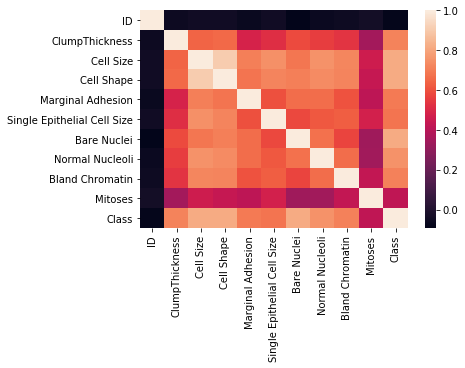

In [82]:
corr = cell_info.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [93]:
# cell_info.corr()
# cell shape and cell size are highly colinear hence dropping cell size. Also dropping id as it does not add anything to the model
cell_info.drop('Cell Size',1, inplace = True)
cell_info.drop('ID',1, inplace = True)

cell_info.head()

,ClumpThickness,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,0.206936,-0.743299,-0.633247,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912,-0.725397
1,0.206936,0.266875,0.768621,1.710106,1.799664,-0.179662,-0.284112,-0.343912,-0.725397
2,-0.503866,-0.743299,-0.633247,-0.549561,-0.410685,-0.179662,-0.611825,-0.343912,-0.725397
3,0.562336,1.613773,-0.633247,-0.097628,0.141902,-0.179662,1.354454,-0.343912,-0.725397
4,-0.148465,-0.743299,0.067687,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912,-0.725397


### Divide the dataset into feature set and target set

In [122]:
test_df = cell_info
X = pd.DataFrame()
Y = pd.DataFrame()
for column in test_df.columns:
    if(column != 'Class'):
        X[column] = test_df[column]
    else:
        Y[column] = test_df[column].astype(str)
print(X)
print("!!!!")
print(Y)

     ClumpThickness  Cell Shape  Marginal Adhesion  \
0          0.206936   -0.743299          -0.633247   
1          0.206936    0.266875           0.768621   
2         -0.503866   -0.743299          -0.633247   
3          0.562336    1.613773          -0.633247   
4         -0.148465   -0.743299           0.067687   
5          1.273138    2.287222           1.820022   
6         -1.214667   -0.743299          -0.633247   
7         -0.859266   -0.406574          -0.633247   
8         -0.859266   -0.743299          -0.633247   
9         -0.148465   -0.743299          -0.633247   
10        -1.214667   -0.743299          -0.633247   
11        -0.859266   -0.743299          -0.633247   
12         0.206936   -0.069850           0.067687   
13        -1.214667   -0.743299          -0.633247   
14         1.273138    0.603599           2.520955   
15         0.917737    0.940324           0.418154   
16        -0.148465   -0.743299          -0.633247   
17        -0.148465   -0.743

### Divide the Training and Test sets in 70:30 

In [123]:
from sklearn.model_selection  import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

     ClumpThickness  Cell Shape  Marginal Adhesion  \
483        1.273138    1.613773           0.768621   
667       -0.503866   -0.743299          -0.633247   
167        1.983939    2.287222           2.520955   
230        0.917737    1.277048           0.418154   
151        0.917737    0.266875          -0.633247   
637       -0.148465    0.266875           0.067687   
257       -0.503866   -0.743299          -0.633247   
584        0.206936   -0.743299           1.119088   
614       -0.859266   -0.743299          -0.633247   
126        0.917737   -0.069850           1.469555   
444        0.206936   -0.743299           1.119088   
524       -0.503866   -0.743299          -0.633247   
298        1.273138   -0.743299          -0.633247   
660       -1.214667   -0.743299          -0.633247   
153       -0.148465   -0.743299          -0.633247   
56         1.273138    2.287222          -0.633247   
602       -0.148465   -0.743299          -0.633247   
349       -0.148465   -0.069

### Model 1 : Implement a default Decision Tree model with no attributes

In [124]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree = decision_tree.fit(X_train, y_train)
decision_tree.score(X_train,y_train)

1.0

### Check the feature importances of the Decision Tree model

In [125]:
decision_tree.feature_importances_

array([0.0672121 , 0.70175147, 0.02729875, 0.01952218, 0.14630116,
       0.0044495 , 0.03127037, 0.00219448])

### Check the training & test accuracy of model 1 

In [126]:
print(decision_tree.score(X_train,y_train))
print(decision_tree.score(X_test,y_test))


1.0
0.9476190476190476


### Model 2: Implement a decision tree with depth of the tree = 10 and leaf nodes = 5

In [127]:
decision_tree_depth = DecisionTreeClassifier(max_depth = 10, max_leaf_nodes = 5)
decision_tree_depth = decision_tree_depth.fit(X_train, y_train)
decision_tree_depth.score(X_train,y_train)

0.9570552147239264

### Check the training & test accuracy of model 2

In [128]:
print(decision_tree_depth.score(X_train,y_train))
print(decision_tree_depth.score(X_test,y_test))


0.9570552147239264
0.9333333333333333


### Print the confusion matrix of model 1 and model 2

In [129]:
from sklearn.metrics import confusion_matrix

y_pred = decision_tree.predict(X_test)
y_true = decision_tree_depth.predict(X_test)

confusion_matrix(y_pred,y_test)

array([[136,   3],
       [  8,  63]], dtype=int64)